In [1]:
import pandas as pd
import numpy as np
import math
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

#### AMPDS Dataset
We may train a EBE consumption vs. EQE consumption vs. OFE consumption vs. Total consumption model 

In [2]:
AMPDS_B1E_df = pd.read_csv('AMPDS/B1E.csv')
AMPDS_B2E_df = pd.read_csv('AMPDS/B2E.csv')
AMPDS_BME_df = pd.read_csv('AMPDS/BME.csv')
AMPDS_CDE_df = pd.read_csv('AMPDS/CDE.csv')
AMPDS_CWE_df = pd.read_csv('AMPDS/CWE.csv')
AMPDS_DNE_df = pd.read_csv('AMPDS/DNE.csv')
AMPDS_DWE_df = pd.read_csv('AMPDS/DWE.csv')
AMPDS_EBE_df = pd.read_csv('AMPDS/EBE.csv')
AMPDS_EQE_df = pd.read_csv('AMPDS/EQE.csv')
AMPDS_FGE_df = pd.read_csv('AMPDS/FGE.csv')
AMPDS_FRE_df = pd.read_csv('AMPDS/FRE.csv')
AMPDS_GRE_df = pd.read_csv('AMPDS/GRE.csv')
AMPDS_HPE_df = pd.read_csv('AMPDS/HPE.csv')
AMPDS_HTE_df = pd.read_csv('AMPDS/HTE.csv')
AMPDS_OFE_df = pd.read_csv('AMPDS/OFE.csv')
AMPDS_OUE_df = pd.read_csv('AMPDS/OUE.csv')
AMPDS_TVE_df = pd.read_csv('AMPDS/TVE.csv')
AMPDS_UTE_df = pd.read_csv('AMPDS/UTE.csv')
AMPDS_WHE_df = pd.read_csv('AMPDS/WHE.csv')
AMPDS_WOE_df = pd.read_csv('AMPDS/WOE.csv')

In [3]:
AMPDS_B1E_df = AMPDS_B1E_df.loc[:,['TS','Pt']]
AMPDS_B2E_df = AMPDS_B2E_df.loc[:,['TS','Pt']]
AMPDS_BME_df = AMPDS_BME_df.loc[:,['TS','Pt']]
AMPDS_CDE_df = AMPDS_CDE_df.loc[:,['TS','Pt']]
AMPDS_CWE_df = AMPDS_CWE_df.loc[:,['TS','Pt']]
AMPDS_DNE_df = AMPDS_DNE_df.loc[:,['TS','Pt']]
AMPDS_DWE_df = AMPDS_DWE_df.loc[:,['TS','Pt']]
AMPDS_EBE_df = AMPDS_EBE_df.loc[:,['TS','Pt']]
AMPDS_EQE_df = AMPDS_EQE_df.loc[:,['TS','Pt']]
AMPDS_FGE_df = AMPDS_FGE_df.loc[:,['TS','Pt']]
AMPDS_FRE_df = AMPDS_FRE_df.loc[:,['TS','Pt']]
AMPDS_GRE_df = AMPDS_GRE_df.loc[:,['TS','Pt']]
AMPDS_HPE_df = AMPDS_HPE_df.loc[:,['TS','Pt']]
AMPDS_HTE_df = AMPDS_HTE_df.loc[:,['TS','Pt']]
AMPDS_OFE_df = AMPDS_OFE_df.loc[:,['TS','Pt']]
AMPDS_OUE_df = AMPDS_OUE_df.loc[:,['TS','Pt']]
AMPDS_TVE_df = AMPDS_TVE_df.loc[:,['TS','Pt']]
AMPDS_UTE_df = AMPDS_UTE_df.loc[:,['TS','Pt']]
AMPDS_WHE_df = AMPDS_WHE_df.loc[:,['TS','Pt']]
AMPDS_WOE_df = AMPDS_WOE_df.loc[:,['TS','Pt']] 

In [4]:
AMPDS_B1E_df.rename(columns = {'Pt': 'Pt_B1E'}, inplace = True)
AMPDS_B2E_df.rename(columns = {'Pt': 'Pt_B2E'}, inplace = True)
AMPDS_BME_df.rename(columns = {'Pt': 'Pt_BME'}, inplace = True)
AMPDS_CDE_df.rename(columns = {'Pt': 'Pt_CDE'}, inplace = True)
AMPDS_CWE_df.rename(columns = {'Pt': 'Pt_CWE'}, inplace = True)
AMPDS_DNE_df.rename(columns = {'Pt': 'Pt_DNE'}, inplace = True)
AMPDS_DWE_df.rename(columns = {'Pt': 'Pt_DWE'}, inplace = True)
AMPDS_EBE_df.rename(columns = {'Pt': 'Pt_EBE'}, inplace = True)
AMPDS_EQE_df.rename(columns = {'Pt': 'Pt_EQE'}, inplace = True)
AMPDS_FGE_df.rename(columns = {'Pt': 'Pt_FGE'}, inplace = True)
AMPDS_FRE_df.rename(columns = {'Pt': 'Pt_FRE'}, inplace = True)
AMPDS_GRE_df.rename(columns = {'Pt': 'Pt_GRE'}, inplace = True)
AMPDS_HPE_df.rename(columns = {'Pt': 'Pt_HPE'}, inplace = True)
AMPDS_HTE_df.rename(columns = {'Pt': 'Pt_HTE'}, inplace = True)
AMPDS_OFE_df.rename(columns = {'Pt': 'Pt_OFE'}, inplace = True)
AMPDS_OUE_df.rename(columns = {'Pt': 'Pt_OUE'}, inplace = True)
AMPDS_TVE_df.rename(columns = {'Pt': 'Pt_TVE'}, inplace = True)
AMPDS_UTE_df.rename(columns = {'Pt': 'Pt_UTE'}, inplace = True)
AMPDS_WHE_df.rename(columns = {'Pt': 'Pt_WHE'}, inplace = True)
AMPDS_WOE_df.rename(columns = {'Pt': 'Pt_WOE'}, inplace = True)

In [5]:

AMPDS_dataframes = [AMPDS_B1E_df,
AMPDS_B2E_df,
AMPDS_BME_df,
AMPDS_CDE_df,
AMPDS_CWE_df,
AMPDS_DNE_df,
AMPDS_DWE_df,
AMPDS_EBE_df,
AMPDS_EQE_df,
AMPDS_FGE_df,
AMPDS_FRE_df,
AMPDS_GRE_df,
AMPDS_HPE_df,
AMPDS_HTE_df,
AMPDS_OFE_df,
AMPDS_OUE_df,
AMPDS_TVE_df,
AMPDS_UTE_df,
AMPDS_WHE_df,
AMPDS_WOE_df]
AMPDS_df = reduce(lambda  left,right: pd.merge(left,right,on='TS',
                                            how='outer'), AMPDS_dataframes)
AMPDS_df.set_index('TS', inplace=True)

In [6]:
AMPDS_df

,Pt_B1E,Pt_B2E,Pt_BME,Pt_CDE,Pt_CWE,Pt_DNE,Pt_DWE,Pt_EBE,Pt_EQE,Pt_FGE,Pt_FRE,Pt_GRE,Pt_HPE,Pt_HTE,Pt_OFE,Pt_OUE,Pt_TVE,Pt_UTE,Pt_WHE,Pt_WOE
TS,,,,,,,,,,,,,,,,,,,,
1333263600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1333263660,0,1,1,76,0,0,0,0,0,2,2,0,30,0,0,0,1,0,117,0
1333263720,0,1,0,75,0,0,0,0,1,2,2,0,30,1,1,0,1,0,117,0
1333263780,0,1,0,76,0,0,0,0,1,2,2,0,0,0,0,0,0,0,88,0
1333263840,0,1,0,76,0,0,0,0,0,2,1,0,0,0,1,0,1,0,88,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364799300,0,0,6,0,0,0,0,1,1,0,2,0,1,0,1,0,0,1,65,52
1364799360,0,0,6,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,47,35
1364799420,0,0,6,0,0,0,0,1,1,0,2,0,1,0,1,0,0,1,34,19


In [7]:
AMPDS_df['Total Energy']= AMPDS_df.sum(axis=1)

In [8]:
AMPDS_df = AMPDS_df.loc[:, ['Pt_EBE', 'Pt_EQE','Pt_OFE','Total Energy']]
AMPDS_df

,Pt_EBE,Pt_EQE,Pt_OFE,Total Energy
TS,,,,
1333263600,0,0,0,0
1333263660,0,0,0,230
1333263720,0,1,1,231
1333263780,0,1,0,170
1333263840,0,0,1,170
...,...,...,...,...
1364799300,1,1,1,130
1364799360,0,0,0,92
1364799420,1,1,1,66


In [9]:
AMPDS_df.rename(columns = {'Pt_EBE': 'Electronics Workbench Energy', 'Pt_EQE': 'Network Equipment Energy','Pt_OFE':'Home Office Energy'}, inplace = True)
AMPDS_df.reset_index(inplace=True)
AMPDS_df['TS'] = pd.to_datetime(AMPDS_df['TS'], unit='s')
AMPDS_df = AMPDS_df.resample('H', on='TS').sum()
AMPDS_df

,Electronics Workbench Energy,Network Equipment Energy,Home Office Energy,Total Energy
TS,,,,
2012-04-01 07:00:00,0,38,18,8569
2012-04-01 08:00:00,0,39,17,2007
2012-04-01 09:00:00,0,40,17,2512
2012-04-01 10:00:00,0,39,19,1949
2012-04-01 11:00:00,0,40,18,3250
...,...,...,...,...
2013-04-01 02:00:00,26,40,32,913
2013-04-01 03:00:00,26,40,33,1241
2013-04-01 04:00:00,27,41,35,916


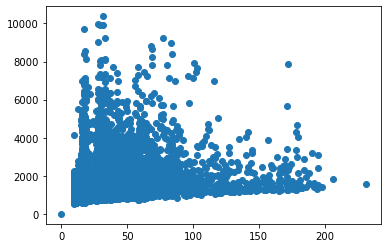

In [10]:
plt.scatter(AMPDS_df['Home Office Energy'], AMPDS_df['Total Energy'])
plt.show()

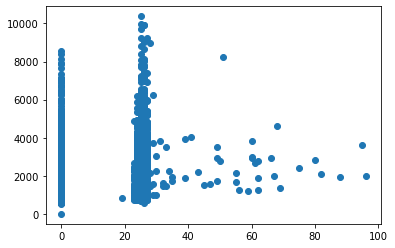

In [11]:
plt.scatter(AMPDS_df['Electronics Workbench Energy'], AMPDS_df['Total Energy'])
plt.show()

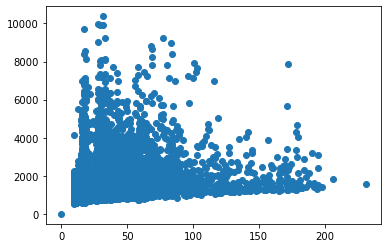

In [12]:
plt.scatter(AMPDS_df['Home Office Energy'], AMPDS_df['Total Energy'])
plt.show()

### RAE dataset
For house 1, we may train a home office consumption vs. Total consumption model 

For house 2, we may train a mobile phone charger vs. Total consumption model 

##### House 1

In [13]:
RAE_house1_df = pd.read_csv('RAE/house1_subs_blk1.csv')
RAE_house1_df =  RAE_house1_df.loc[:,['unix_ts', 'sub' ,'Pt']]

In [14]:
house1_total_energy = RAE_house1_df.groupby(['unix_ts'])['Pt'].sum()
house1_total_energy

unix_ts
1454832000      2078
1454832001      2078
1454832002      2079
1454832003      2079
1454832004      2079
               ...  
1455609595    293927
1455609596    293927
1455609597    293927
1455609598    293927
1455609599    293927
Name: Pt, Length: 777600, dtype: int64

In [15]:
RAE_house1_df = RAE_house1_df[RAE_house1_df['sub'] == 24]
RAE_house1_df['Total Energy'] = list(house1_total_energy)
RAE_house1_df.rename(columns = {'unix_ts': 'TS', 'Pt': 'Home Office Energy'}, inplace = True)
RAE_house1_df.set_index('TS', inplace=True)
RAE_house1_df.drop('sub', axis='columns', inplace=True)
RAE_house1_df.reset_index(inplace=True)
RAE_house1_df['TS'] = pd.to_datetime(RAE_house1_df['TS'], unit='s')
RAE_house1_df = RAE_house1_df.resample('H', on='TS').sum()
RAE_house1_df

,Home Office Energy,Total Energy
TS,,
2016-02-07 08:00:00,1334920,8580357
2016-02-07 09:00:00,1889286,10850116
2016-02-07 10:00:00,2455099,13088564
2016-02-07 11:00:00,3023684,15410459
2016-02-07 12:00:00,3593564,18151874
...,...,...
2016-02-16 03:00:00,130892021,1034624694
2016-02-16 04:00:00,131500916,1041869115
2016-02-16 05:00:00,132095008,1049791213


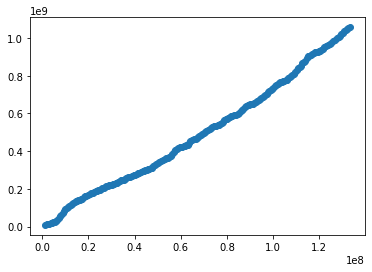

In [16]:
plt.scatter(RAE_house1_df['Home Office Energy'], RAE_house1_df['Total Energy'])
plt.show()

##### House 2

In [17]:
chunks = []
chunksize = 10 ** 6
for chunk in pd.read_csv('RAE/house2_subs_blk1.csv', chunksize=chunksize):
    chunks.append(chunk)

In [18]:
RAE_house2_dataframes = []
for i in range(0, len(chunks) - 8, 8):
    RAE_house2_df = pd.concat(chunks[i:i+8], ignore_index=True)
    RAE_house2_df =  RAE_house2_df.loc[:,['unix_ts', 'sub' ,'Pt']]
    house2_total_energy = RAE_house2_df.groupby(['unix_ts'])['Pt'].sum()
    house2_total_energy = house2_total_energy.rename('Total Energy')
    RAE_house2_df = RAE_house2_df[RAE_house2_df['sub'] == 21]
    RAE_house2_df.rename(columns = {'Pt': 'Mobile Phone Charger Energy', 'unix_ts' : 'TS'}, inplace = True)
    RAE_house2_df.set_index('TS', inplace = True)
    RAE_house2_df = RAE_house2_df.join(house2_total_energy).drop(['sub'], axis=1)
    RAE_house2_df.reset_index(inplace=True)
    RAE_house2_df['TS'] = pd.to_datetime(RAE_house2_df['TS'], unit='s')
    RAE_house2_df = RAE_house2_df.resample('H', on='TS').sum()
    RAE_house2_dataframes.append(RAE_house2_df)

In [19]:
for RAE_house2_dataframe in RAE_house2_dataframes:
    RAE_house2_dataframe.drop(RAE_house2_dataframe.tail(1).index,inplace=True) 

In [20]:
RAE_house2_df = pd.concat(RAE_house2_dataframes)
RAE_house2_df

,Mobile Phone Charger Energy,Total Energy
TS,,
2017-09-13 07:00:00,64800,127626442
2017-09-13 08:00:00,64800,128692205
2017-09-13 09:00:00,67275,129773116
2017-09-13 10:00:00,68400,130822423
2017-09-13 11:00:00,68400,132008296
...,...,...
2017-11-10 19:00:00,1429200,3580957416
2017-11-10 20:00:00,1429200,3582949253
2017-11-10 21:00:00,1429200,3584825736


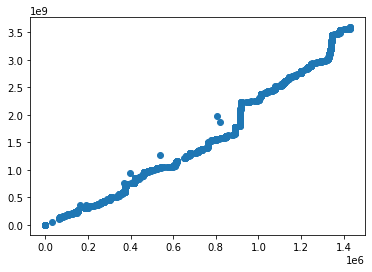

In [21]:
plt.scatter(RAE_house2_df['Mobile Phone Charger Energy'], RAE_house2_df['Total Energy'])
plt.show()

### HUE dataset

In [22]:
HUE_1_df = pd.read_csv('HUE/Residential_1.csv')
HUE_2_df = pd.read_csv('HUE/Residential_2.csv')
HUE_3_df = pd.read_csv('HUE/Residential_3.csv')
HUE_4_df = pd.read_csv('HUE/Residential_4.csv')
HUE_5_df = pd.read_csv('HUE/Residential_5.csv')
HUE_6_df = pd.read_csv('HUE/Residential_6.csv')
HUE_7_df = pd.read_csv('HUE/Residential_7.csv')
HUE_8_df = pd.read_csv('HUE/Residential_8.csv')
HUE_9_df = pd.read_csv('HUE/Residential_9.csv')
HUE_10_df = pd.read_csv('HUE/Residential_10.csv')
HUE_11_df = pd.read_csv('HUE/Residential_11.csv')
HUE_12_df = pd.read_csv('HUE/Residential_12.csv')
HUE_13_df = pd.read_csv('HUE/Residential_13.csv')
HUE_14_df = pd.read_csv('HUE/Residential_14.csv')
HUE_15_df = pd.read_csv('HUE/Residential_15.csv')
HUE_16_df = pd.read_csv('HUE/Residential_16.csv')
HUE_17_df = pd.read_csv('HUE/Residential_17.csv')
HUE_18_df = pd.read_csv('HUE/Residential_18.csv')
HUE_19_df = pd.read_csv('HUE/Residential_19.csv')
HUE_20_df = pd.read_csv('HUE/Residential_20.csv')
HUE_21_df = pd.read_csv('HUE/Residential_21.csv')
HUE_22_df = pd.read_csv('HUE/Residential_22.csv')
HUE_23_df = pd.read_csv('HUE/Residential_23.csv')
HUE_24_df = pd.read_csv('HUE/Residential_24.csv')
HUE_25_df = pd.read_csv('HUE/Residential_25.csv')
HUE_26_df = pd.read_csv('HUE/Residential_26.csv')
HUE_27_df = pd.read_csv('HUE/Residential_27.csv')
HUE_28_df = pd.read_csv('HUE/Residential_28.csv')

In [23]:
HUE_resident_dataframes = [HUE_1_df, HUE_2_df, HUE_3_df, HUE_4_df, HUE_5_df, HUE_6_df, HUE_7_df, HUE_8_df, HUE_9_df, HUE_10_df, 
                           HUE_11_df, HUE_12_df, HUE_13_df, HUE_14_df, HUE_15_df, HUE_16_df, HUE_17_df, HUE_18_df, HUE_19_df, 
                           HUE_20_df, HUE_21_df, HUE_22_df, HUE_23_df, HUE_24_df, HUE_25_df, HUE_26_df, HUE_27_df, HUE_28_df]

In [24]:
for index, house_df in enumerate(HUE_resident_dataframes):
    house_df['House Number'] = index + 1

In [25]:
for index, house_df in enumerate(HUE_resident_dataframes):
    house_df['timestamp'] = house_df['date'] +'-' + house_df['hour'].map(str)
    house_df['timestamp'] = pd.to_datetime(house_df['timestamp'], format='%Y-%m-%d-%H')
    house_df.set_index(['timestamp'], inplace = True)
    house_df.drop(['date','hour'], axis='columns', inplace=True)

In [26]:
HUE_consolidated_df = pd.concat(HUE_resident_dataframes)

In [27]:
HUE_22_df

,energy_kWh,House Number
timestamp,,
2016-06-29 00:00:00,0.09,22
2016-06-29 01:00:00,0.09,22
2016-06-29 02:00:00,0.09,22
2016-06-29 03:00:00,0.09,22
2016-06-29 04:00:00,0.09,22
...,...,...
2018-06-05 19:00:00,0.12,22
2018-06-05 20:00:00,0.12,22
2018-06-05 21:00:00,0.77,22


### Normalising Datasets

In [28]:
AMPDS_divisor = AMPDS_df['Total Energy'].median(axis = 0) / HUE_consolidated_df['energy_kWh'].median(axis = 0)
RAE_house2_divisor = RAE_house2_df['Total Energy'].median(axis = 0) / HUE_consolidated_df['energy_kWh'].median(axis = 0)
RAE_house1_divisor = RAE_house1_df['Total Energy'].median(axis = 0) / HUE_consolidated_df['energy_kWh'].median(axis = 0)
AMPDS_df = AMPDS_df / AMPDS_divisor
RAE_house2_df = RAE_house2_df / RAE_house2_divisor
RAE_house1_df = RAE_house1_df / RAE_house1_divisor

### Removing AMPDS outliers

In [29]:
AMPDS_q_low = AMPDS_df['Total Energy'].quantile(0.01)
AMPDS_q_hi  = AMPDS_df['Total Energy'].quantile(0.95)
AMPDS_df = AMPDS_df[(AMPDS_df['Total Energy'] < AMPDS_q_hi) & (AMPDS_df['Total Energy'] > AMPDS_q_low)]

### Boxplots

<AxesSubplot:>

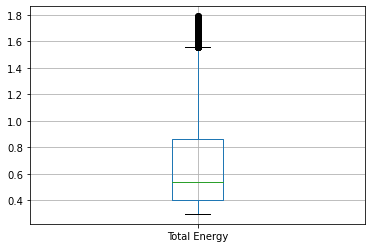

In [30]:
AMPDS_df.boxplot(column = ['Total Energy'])

<AxesSubplot:>

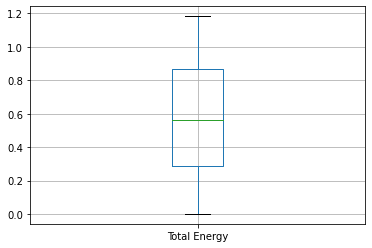

In [31]:
RAE_house2_df.boxplot(column = ['Total Energy'])

<AxesSubplot:>

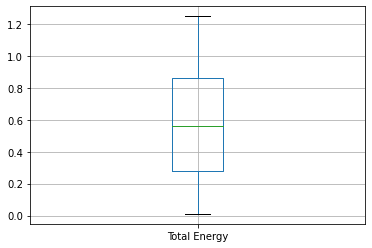

In [32]:
RAE_house1_df.boxplot(column = ['Total Energy'])

<AxesSubplot:>

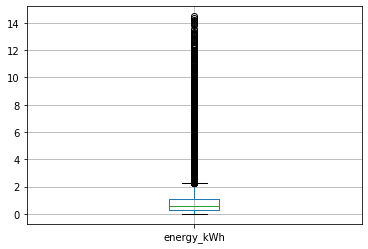

In [33]:
HUE_consolidated_df.boxplot(column = ['energy_kWh'])

In [34]:
AMPDS_df

,Electronics Workbench Energy,Network Equipment Energy,Home Office Energy,Total Energy
TS,,,,
2012-04-01 08:00:00,0.000000,0.018556,0.008088,0.954902
2012-04-01 09:00:00,0.000000,0.019031,0.008088,1.195174
2012-04-01 10:00:00,0.000000,0.018556,0.009040,0.927307
2012-04-01 11:00:00,0.000000,0.019031,0.008564,1.546304
2012-04-01 12:00:00,0.000000,0.018556,0.009040,1.601020
...,...,...,...,...
2013-04-01 02:00:00,0.012370,0.019031,0.015225,0.434393
2013-04-01 03:00:00,0.012370,0.019031,0.015701,0.590450
2013-04-01 04:00:00,0.012846,0.019507,0.016653,0.435820


In [35]:
RAE_house2_df 

,Mobile Phone Charger Energy,Total Energy
TS,,
2017-09-13 07:00:00,0.000021,0.042086
2017-09-13 08:00:00,0.000021,0.042438
2017-09-13 09:00:00,0.000022,0.042794
2017-09-13 10:00:00,0.000023,0.043140
2017-09-13 11:00:00,0.000023,0.043531
...,...,...
2017-11-10 19:00:00,0.000471,1.180865
2017-11-10 20:00:00,0.000471,1.181522
2017-11-10 21:00:00,0.000471,1.182140


In [36]:
RAE_house1_df 

,Home Office Energy,Total Energy
TS,,
2016-02-07 08:00:00,0.001578,0.010140
2016-02-07 09:00:00,0.002233,0.012823
2016-02-07 10:00:00,0.002901,0.015468
2016-02-07 11:00:00,0.003573,0.018212
2016-02-07 12:00:00,0.004247,0.021452
...,...,...
2016-02-16 03:00:00,0.154690,1.222733
2016-02-16 04:00:00,0.155409,1.231294
2016-02-16 05:00:00,0.156112,1.240656


## Splitting HUE dataframes

In [37]:
HUE_consolidated_df.to_csv('Intermediate Datasets/HUE_intermediate_df.csv')
RAE_house1_df.to_csv('Intermediate Datasets/RAE_house1.csv')
RAE_house2_df.to_csv('Intermediate Datasets/RAE_house2.csv')
AMPDS_df.to_csv('Intermediate Datasets/AMPDS.csv')

In [38]:
len(HUE_resident_dataframes)

28

In [39]:
HUE_consolidated_df

,energy_kWh,House Number
timestamp,,
2012-06-01 01:00:00,1.011,1
2012-06-01 02:00:00,0.451,1
2012-06-01 03:00:00,0.505,1
2012-06-01 04:00:00,0.441,1
2012-06-01 05:00:00,0.468,1
...,...,...
2020-05-19 19:00:00,3.060,28
2020-05-19 20:00:00,2.940,28
2020-05-19 21:00:00,1.970,28


In [40]:
HUE_first_df = HUE_consolidated_df[HUE_consolidated_df['House Number'] <= 7]
HUE_second_df = HUE_consolidated_df[(HUE_consolidated_df['House Number'] <= 14) & (HUE_consolidated_df['House Number'] >= 8)]
HUE_third_df = HUE_consolidated_df[(HUE_consolidated_df['House Number'] <= 21) & (HUE_consolidated_df['House Number'] >= 15)]
HUE_fourth_df = HUE_consolidated_df[HUE_consolidated_df['House Number'] >= 22]

In [41]:
HUE_first_df.to_csv('Intermediate Datasets/HUE_first_df.csv')
HUE_second_df.to_csv('Intermediate Datasets/HUE_second_df.csv')
HUE_third_df.to_csv('Intermediate Datasets/HUE_third_df.csv')
HUE_fourth_df.to_csv('Intermediate Datasets/HUE_fourth_df.csv')